<a href="https://colab.research.google.com/github/Alfinbastian04/Maching-Learning/blob/main/uts/Credit_Score_with_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA : ALFIN ANDREAS BASTIAN S
NIM : 1103202143
UTS Credit score train with random forest

hubungkan Google Drive dengan GColab

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# Hubungkan GDrive dengan GColab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Baca dan Tampilkan Data



In [ ]:
# Baca file .csv dari GDrive
train = pd.read_csv('/content/gdrive/MyDrive/Dataset/train.csv', dtype={'Column26': str})

# Tampilkan baris dari dataframe 'train'
train.head()

<ipython-input-3-fee8c25ff1a1>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/content/gdrive/MyDrive/Dataset/train.csv', dtype={'Column26': str})


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Konversi menjadi bilangan bulat

In [ ]:
train['Age'] = train['Age'].fillna('0').str.extract('(\d+)').astype(float).astype(int)
train['Num_of_Loan'] = train['Num_of_Loan'].fillna('0').str.extract('(\d+)').astype(float).astype(int)
train['Num_of_Delayed_Payment'] = train['Num_of_Delayed_Payment'].fillna('0').str.extract('(\d+)').astype(float).astype(int)

In [ ]:
train['Annual_Income'] = train['Annual_Income'].str.replace(r'[^0-9.]', '', regex=True)
train['Annual_Income'] = train['Annual_Income'].astype(float)

In [ ]:
train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].replace('_', np.nan)
train['Changed_Credit_Limit'] = pd.to_numeric(train['Changed_Credit_Limit'], errors='coerce')
train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].fillna(0)

In [ ]:
train['Outstanding_Debt'] = train['Outstanding_Debt'].astype(str)
train['Outstanding_Debt'] = train['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True)
train['Outstanding_Debt'] = pd.to_numeric(train['Outstanding_Debt'], errors='coerce')
train['Outstanding_Debt'] = train['Outstanding_Debt'].fillna(0)

In [ ]:
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].astype(str)
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].replace('', '0')
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].str.replace(r'[^0-9.]', '')
train['Amount_invested_monthly'] = pd.to_numeric(train['Amount_invested_monthly'], errors='coerce')
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].fillna(0)

In [ ]:
train['Monthly_Balance'] = train['Monthly_Balance'].astype(str)
train['Monthly_Balance'] = train['Monthly_Balance'].str.replace(r'[^0-9.-]+', '')
train['Monthly_Balance'] = pd.to_numeric(train['Monthly_Balance'], errors='coerce')
train['Monthly_Balance'] = train['Monthly_Balance'].fillna(0)

In [ ]:
def parse_years_and_months(age):
    if isinstance(age, str):
        age_parts = age.split(' Years and ')
        years = int(age_parts[0]) if 'Years' in age else 0
        months_str = age_parts[1].split(' Months')[0] if 'Months' in age_parts[1] else '0'
        months = int(months_str)
        total_months = years * 12 + months
        return total_months
    else:
        return 0
train['Credit_History_Age_Months'] = train['Credit_History_Age'].apply(parse_years_and_months)

duplikat dalam DataFrame

In [ ]:
# Metode duplicated()
duplicates = train[train.duplicated()]

# Tampung jumlah baris yang duplikat menggunakan shape[0]
num_duplicates = duplicates.shape[0]

# Pengujian kondisional
if num_duplicates == 0:
    print("Tidak ada duplikat")
else:
    print("Masih ada", num_duplicates, "duplikat.")

Tidak ada duplikat


Scalling Data

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,119.509700,6.847573e+02,14.000000,25.000000,34.000000,42.000000,8.698000e+03
Annual_Income,100000.0,176415.701298,1.429618e+06,7005.930000,19457.500000,37578.610000,72790.920000,2.419806e+07
Monthly_Inhand_Salary,84998.0,4194.170850,3.183686e+03,303.645417,1625.568229,3093.745000,5957.448333,1.520463e+04
Num_Bank_Accounts,100000.0,17.091280,1.174048e+02,-1.000000,3.000000,6.000000,7.000000,1.798000e+03
Num_Credit_Card,100000.0,22.474430,1.290574e+02,0.000000,4.000000,5.000000,7.000000,1.499000e+03
Interest_Rate,100000.0,72.466040,4.664226e+02,1.000000,8.000000,13.000000,20.000000,5.797000e+03
Num_of_Loan,100000.0,10.761960,6.178993e+01,0.000000,2.000000,3.000000,6.000000,1.496000e+03
Delay_from_due_date,100000.0,21.068780,1.486010e+01,-5.000000,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,100000.0,28.779410,2.181148e+02,0.000000,8.000000,13.000000,18.000000,4.397000e+03
Changed_Credit_Limit,100000.0,10.171791,6.880628e+00,-6.490000,4.970000,9.250000,14.660000,3.697000e+01


Hilangkan outlier pada dataframe

In [ ]:
# Pilih kolom tertentu
selected_columns_train = train[['Num_Bank_Accounts', 'Interest_Rate', 'Annual_Income', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Total_EMI_per_month', 'Num_of_Loan', 'Num_Credit_Card']]

# Tentukan persentil untuk setiap kolom yang dipilih
percentile_threshold = 0.98
percentiles = selected_columns_train.quantile(percentile_threshold)

# Hapus perulangan nilai untuk setiap kolom yang masih diatas persentil yang ditentukan sebelumnya
for column in selected_columns_train.columns:
    train = train[train[column] <= percentiles[column]]

Hasil dari scalling menjadi tidak ada data yang outlier

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,78619.0,120.713136,690.594159,14.000000,25.000000,34.000000,43.000000,8698.000000
Annual_Income,78619.0,47570.283282,33791.574403,7005.930000,19303.210000,36127.640000,69083.080000,142170.120000
Monthly_Inhand_Salary,66754.0,3960.360146,2820.240923,303.645417,1625.558333,3025.770000,5758.606667,12025.253333
Num_Bank_Accounts,78619.0,5.318549,2.554273,-1.000000,3.000000,5.000000,7.000000,10.000000
Num_Credit_Card,78619.0,5.476577,2.035290,0.000000,4.000000,5.000000,7.000000,10.000000
Interest_Rate,78619.0,14.116715,8.377385,1.000000,7.000000,13.000000,19.000000,33.000000
Num_of_Loan,78619.0,7.242041,18.887464,0.000000,2.000000,3.000000,5.000000,100.000000
Delay_from_due_date,78619.0,20.557880,14.439021,-5.000000,10.000000,18.000000,27.000000,67.000000
Num_of_Delayed_Payment,78619.0,12.132551,6.657665,0.000000,8.000000,13.000000,18.000000,24.000000
Changed_Credit_Limit,78619.0,10.114420,6.749482,-6.490000,5.050000,9.270000,14.490000,36.970000


In [ ]:
# Hilangkan nilai '!@9#%8' pada kolom Payment_Behaviour
train = train[train['Payment_Behaviour'] != '!@9#%8']

# Hilangkan nilai '_______' pada kolom Occupation
train = train[train['Occupation'] != '_______']

# Cetak nilai unik dari kolom Occupation setelah penghapusan dilakukan
print(train['Occupation'].unique())

['Scientist' 'Teacher' 'Entrepreneur' 'Developer' 'Lawyer' 'Media_Manager'
 'Doctor' 'Journalist' 'Engineer' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']


In [ ]:
# Buat dataframe baru pada Credit_Mix yang tidak ada nilai '_'
train = train[train['Credit_Mix'] != '_']

# Cetak nilai unik pada kolom Credit_Mix
print(train['Credit_Mix'].unique())

['Good' 'Standard' 'Bad']


Nilai Negatif

In [ ]:
# Seleksi kolom untuk filtering
selected_columns = ['Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Bank_Accounts']

# Lakukan perulangan untuk selain kurang dari 0 dihapus dari dataframe
for column in selected_columns:
    train = train[train[column] >= 0]


In [ ]:
# Drop daftar yang diinginkan
columns_to_drop = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Credit_History_Age','Monthly_Inhand_Salary', 'Type_of_Loan']

# Drop columns tersebut
train.drop(columns=columns_to_drop, inplace=True)


Nilai yang hilang/missing values

In [ ]:
# Periksa total jumlah data yang kosong dalam dataframe
total_missing_values = train.isnull().sum().sum()

# Lakukan pengujian kondisional
if total_missing_values == 0:
    print("Tidak ada data yang kosong")
else:
    print("Jumlah data yang kosong :", total_missing_values)

Tidak ada data yang kosong


# Feature Engineering

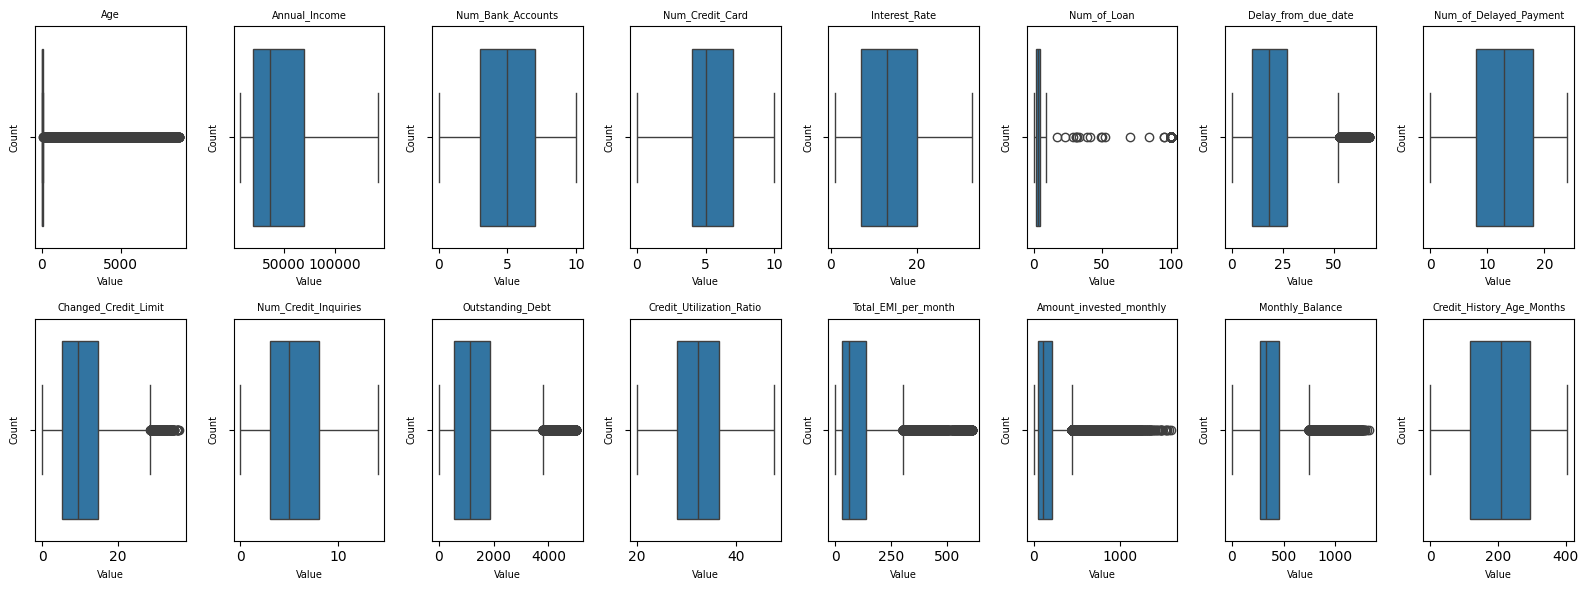

In [ ]:
# Identifikasi jenis-jenis tipe data dan dimasukkan kedalam numerik kolom
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns

# Jumlah kolom yang ingin ditampilkan
num_columns = 8

# Jumlah baris yang ditampilkan sesuai dengan jumlah kolom yang ditentukan
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns

# Ukuran subplot
fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 6))

axes = axes.flatten()

# Loop untuk membuat boxplot
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=train[column], ax=axes[i])
    axes[i].set_title(column, fontsize=7)
    axes[i].set_xlabel('Value', fontsize=7)
    axes[i].set_ylabel('Count', fontsize=7)

# Sembunyikan subplot yang tidak digunakan
for j in range(len(numeric_columns), num_columns*num_rows):
    axes[j].axis('off')

# Tata ulang tata letak plot
plt.tight_layout()

# Tampilkan Plot
plt.show()

Scalling dataframe dengan batasan tertentu

In [ ]:
# Tune scale pada tiap kolom
train = train[train['Age'] < 60]
train = train[train['Num_Credit_Card'] <= 10]
train = train[train['Interest_Rate'] <= 50]
train = train[train['Num_of_Loan'] <= 12]
train = train[train['Num_Bank_Accounts'] <= 10]
train = train[train['Delay_from_due_date'] <= 60]
train = train[train['Changed_Credit_Limit'] <= 30]
train = train[train['Num_Credit_Inquiries'] <= 12]
train = train[train['Total_EMI_per_month'] <= 200]
train = train[train['Outstanding_Debt'] <= 1500]

Encoding

In [ ]:
#Label Encoder
categories = ['Poor', 'Standard', 'Good']

encoder = OrdinalEncoder(categories=[categories])

train['Credit_Score_Encoded'] = encoder.fit_transform(train[['Credit_Score']])

# Encoding Occupation
label_encoder = LabelEncoder()
train['Occupation_Encoded'] = label_encoder.fit_transform(train['Occupation'])

#Ordinal Encoder
categories = ['Bad', 'Standard', 'Good']

encoder = OrdinalEncoder(categories=[categories])

train['Credit_Mix_Encoded'] = encoder.fit_transform(train[['Credit_Mix']])

categories_payment_behaviour = [
    'Low_spent_Small_value_payments',
    'Low_spent_Medium_value_payments',
    'Low_spent_Large_value_payments',
    'High_spent_Small_value_payments',
    'High_spent_Medium_value_payments',
    'High_spent_Large_value_payments'
]

encoder_payment_behaviour = OrdinalEncoder(categories=[categories_payment_behaviour])

train['Payment_Behaviour_Encoded'] = encoder_payment_behaviour.fit_transform(train[['Payment_Behaviour']])


#Dropping Unencoded Columns
columns_to_drop = [ 'Payment_Behaviour', 'Credit_Mix', 'Occupation','Credit_Score']
train.drop(columns=columns_to_drop, inplace=True)

New Features

In [ ]:
# Hitung total jumlah (Bank Accounts + Credit Cards)
train['Total_Num_Accounts'] = train['Num_Bank_Accounts'] + train['Num_Credit_Card']

# Hitung total jumlah hutang per akun

train['Debt_Per_Account'] = train['Outstanding_Debt'] / train['Total_Num_Accounts']

# Hitung perbandingan hutang dan pemasukan

train['Debt_to_Income_Ratio'] = train['Outstanding_Debt'] / train['Annual_Income']

# Hitung total jumlah pembayaran yang telat per akun

train['Delayed_Payments_Per_Account'] = train['Num_of_Delayed_Payment'] / train['Total_Num_Accounts']

# Hitung pengeluaran bulanan (EMI + Investasi bulanan)

train['Total_Monthly_Expenses'] = train['Total_EMI_per_month'] + train['Amount_invested_monthly']


Mutual Information Scores (MI Score)​

In [ ]:
# Identifikasi kolom-kolom kategorikal dalam DataFrame 'train'
categorical_columns = train.select_dtypes(include=['object']).columns

# Buat salinan data 'train' untuk proses encoding
data_encoded = train.copy()

# Buat encoder Ordinal
encoder = OrdinalEncoder()

# Lakukan encoding pada kolom-kolom kategorikal menggunakan encoder Ordinal
data_encoded[categorical_columns] = encoder.fit_transform(data_encoded[categorical_columns])

# Pisahkan target (y) dan fitur-fitur (X) dari data yang telah diencode
y = data_encoded['Credit_Score_Encoded']
X = data_encoded.drop(columns=['Credit_Score_Encoded'])

# Hitung skor informasi mutual antara setiap fitur dalam X dan target y
mi_scores = mutual_info_classif(X, y)

# Cetak skor informasi mutual untuk setiap fitur
for i, score in enumerate(mi_scores):
    print(f"Feature '{X.columns[i]}': Mutual Information Score = {score}")

Feature 'Age': Mutual Information Score = 0.014295692855129438
Feature 'Occupation': Mutual Information Score = 0.0022876706060726004
Feature 'Annual_Income': Mutual Information Score = 0.42709760738909175
Feature 'Num_Bank_Accounts': Mutual Information Score = 0.06001417551040378
Feature 'Num_Credit_Card': Mutual Information Score = 0.07526059529192364
Feature 'Interest_Rate': Mutual Information Score = 0.10006565925179212
Feature 'Num_of_Loan': Mutual Information Score = 0.018758786176505948
Feature 'Delay_from_due_date': Mutual Information Score = 0.06655524091490372
Feature 'Num_of_Delayed_Payment': Mutual Information Score = 0.04870785741650452
Feature 'Changed_Credit_Limit': Mutual Information Score = 0.10578484728302762
Feature 'Num_Credit_Inquiries': Mutual Information Score = 0.034434942452314043
Feature 'Credit_Mix': Mutual Information Score = 0.175621444929853
Feature 'Outstanding_Debt': Mutual Information Score = 0.4311842109576074
Feature 'Credit_Utilization_Ratio': Mutual

In [ ]:
# Urutkan skor informasi mutual dan nama fitur secara terbalik
sorted_mi_scores = sorted(zip(X.columns, mi_scores), key=lambda x: x[1], reverse=True)

# Dapatkan nama fitur yang sudah diurutkan
sorted_columns = [x[0] for x in sorted_mi_scores]

# Dapatkan skor informasi mutual yang sudah diurutkan
sorted_scores = [x[1] for x in sorted_mi_scores]

# Skala warna yang digunakan untuk plot
colorscale = 'Viridis'

# Buat plot batang dengan menggunakan skor informasi mutual dan nama fitur
fig = go.Figure(data=[go.Bar(x=sorted_columns, y=sorted_scores, marker=dict(color=sorted_scores, colorbar=dict(title='Skor Informasi Mutual', len=0.5, y=0.2)))])

# Sesuaikan tata letak plot dan memberi judul pada sumbu-sumbunya
fig.update_layout(title='Skor Informasi Mutual untuk Setiap Fitur',
                  xaxis_title='Fitur',
                  yaxis_title='Skor Informasi Mutual')

# Menampilkan plot
fig.show()

# Model Machine Learning

In [ ]:
# Siapkan dataframe untuk latih pada variabel y pada kolom Credit_Score_Encoded
y = train['Credit_Score_Encoded']

# Siapkan dataframe untuk latih pada variabel X pada kolom yang ditentukan dibawah
X = train[['Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month',
       'Credit_History_Age_Months', 'Total_Num_Accounts',
       'Debt_Per_Account', 'Debt_to_Income_Ratio', 'Delayed_Payments_Per_Account']]

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

# Random Forest

In [ ]:
model = RandomForestRegressor(n_estimators=500, bootstrap=True, random_state=77)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=77)

# Evaluasi Model
Mean Squared Error (MSE)

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.1699764660740896


Accuracy Test

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=500, bootstrap=True)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

Accuracy on original test set: 0.7915977505788951

Classification report for original test set:
               precision    recall  f1-score   support

         0.0       0.76      0.63      0.69       840
         1.0       0.82      0.87      0.84      3811
         2.0       0.73      0.68      0.70      1395

    accuracy                           0.79      6046
   macro avg       0.77      0.73      0.75      6046
weighted avg       0.79      0.79      0.79      6046



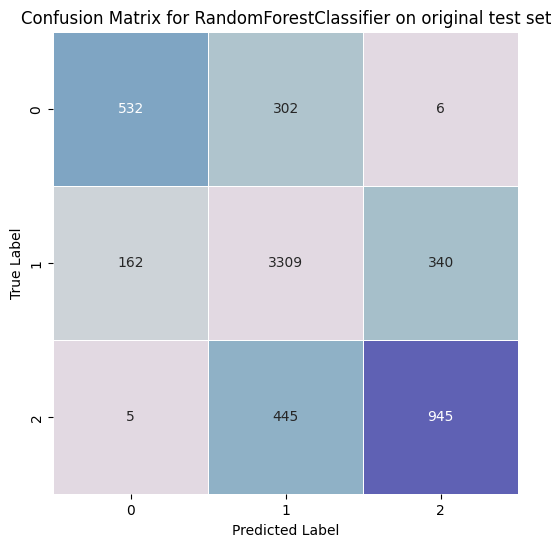

In [ ]:
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on original test set:", accuracy)

matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(matrix, annot=True, cbar=False, cmap='twilight', linewidth=0.5, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for RandomForestClassifier on original test set')

print('\nClassification report for original test set:\n', classification_report(y_test, y_pred))